This notebook explores avocado demand trends across regions over multiple years.
The goal is to understand demand patterns, distribution differences, and broad market shifts,
not to establish causal relationships or make forecasts.

In [573]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [574]:
pd.set_option("display.float_format", "{:.6f}".format)
df = pd.read_csv(filepath_or_buffer='/home/dip__4/Documents/college/ai-sem-3/datasets/avocado.csv', )

In [575]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.330000,64236.620000,1036.740000,54454.850000,48.160000,8696.870000,8603.620000,93.250000,0.000000,conventional,2015,Albany
1,1,2015-12-20,1.350000,54876.980000,674.280000,44638.810000,58.330000,9505.560000,9408.070000,97.490000,0.000000,conventional,2015,Albany
2,2,2015-12-13,0.930000,118220.220000,794.700000,109149.670000,130.500000,8145.350000,8042.210000,103.140000,0.000000,conventional,2015,Albany
3,3,2015-12-06,1.080000,78992.150000,1132.000000,71976.410000,72.580000,5811.160000,5677.400000,133.760000,0.000000,conventional,2015,Albany
4,4,2015-11-29,1.280000,51039.600000,941.480000,43838.390000,75.780000,6183.950000,5986.260000,197.690000,0.000000,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.630000,17074.830000,2046.960000,1529.200000,0.000000,13498.670000,13066.820000,431.850000,0.000000,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.710000,13888.040000,1191.700000,3431.500000,0.000000,9264.840000,8940.040000,324.800000,0.000000,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.870000,13766.760000,1191.920000,2452.790000,727.940000,9394.110000,9351.800000,42.310000,0.000000,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.930000,16205.220000,1527.630000,2981.040000,727.010000,10969.540000,10919.540000,50.000000,0.000000,organic,2018,WestTexNewMexico


In [576]:
df.shape

(18249, 14)

In [577]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.330000,64236.620000,1036.740000,54454.850000,48.160000,8696.870000,8603.620000,93.250000,0.000000,conventional,2015,Albany
1,1,2015-12-20,1.350000,54876.980000,674.280000,44638.810000,58.330000,9505.560000,9408.070000,97.490000,0.000000,conventional,2015,Albany
2,2,2015-12-13,0.930000,118220.220000,794.700000,109149.670000,130.500000,8145.350000,8042.210000,103.140000,0.000000,conventional,2015,Albany
3,3,2015-12-06,1.080000,78992.150000,1132.000000,71976.410000,72.580000,5811.160000,5677.400000,133.760000,0.000000,conventional,2015,Albany
4,4,2015-11-29,1.280000,51039.600000,941.480000,43838.390000,75.780000,6183.950000,5986.260000,197.690000,0.000000,conventional,2015,Albany


In [578]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.630000,17074.830000,2046.960000,1529.200000,0.000000,13498.670000,13066.820000,431.850000,0.000000,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.710000,13888.040000,1191.700000,3431.500000,0.000000,9264.840000,8940.040000,324.800000,0.000000,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.870000,13766.760000,1191.920000,2452.790000,727.940000,9394.110000,9351.800000,42.310000,0.000000,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.930000,16205.220000,1527.630000,2981.040000,727.010000,10969.540000,10919.540000,50.000000,0.000000,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.620000,17489.580000,2894.770000,2356.130000,224.530000,12014.150000,11988.140000,26.010000,0.000000,organic,2018,WestTexNewMexico


In [579]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [580]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [581]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,24.232232,1.405978,850644.013009,293008.424531,295154.568356,22839.735993,239639.202060,182194.686696,54338.088145,3106.426507,2016.147899
std,15.481045,0.402677,3453545.355399,1264989.081763,1204120.401135,107464.068435,986242.399216,746178.514962,243965.964547,17692.894652,0.939938
min,0.000000,0.440000,84.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,10.000000,1.100000,10838.580000,854.070000,3008.780000,0.000000,5088.640000,2849.420000,127.470000,0.000000,2015.000000
50%,24.000000,1.370000,107376.760000,8645.300000,29061.020000,184.990000,39743.830000,26362.820000,2647.710000,0.000000,2016.000000
75%,38.000000,1.660000,432962.290000,111020.200000,150206.860000,6243.420000,110783.370000,83337.670000,22029.250000,132.500000,2017.000000
max,52.000000,3.250000,62505646.520000,22743616.170000,20470572.610000,2546439.110000,19373134.370000,13384586.800000,5719096.610000,551693.650000,2018.000000


In [582]:
df.iloc[:, 0].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52])

In [583]:
df.iloc[:, 0].nunique()

53

In [584]:
df['region'].value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

In [585]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [586]:
df.loc[:, 'type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [587]:
avocado_category = df.loc[:, ['4046', '4225', '4770']]

### For context:

#### 4046 → (total no of avacados) Hass, conventional

#### 4225 → (total no of avacados) Hass, organic

#### 4770 → (total no of avacados) Large green avocados (like Florida types)

In [588]:
reason_wise_type = df.drop(labels=['year', 'Date', 'Unnamed: 0'], axis=1)

In [589]:
groupby_reason_wise_and_type = reason_wise_type.groupby(
    ['region', 'type']
).agg(
    total_demand=('Total Volume', 'sum'),
    avg_price=('AveragePrice', 'mean'),
    small_bags=('Small Bags', 'sum'),
    large_bags=('Large Bags', 'sum'),
    xlarge_bags=('XLarge Bags', 'sum')
)

In [590]:
groupby_reason_wise_and_type.sort_values(by=['total_demand'], ascending=True, inplace=True)

In [591]:
groupby_reason_wise_and_type

,,total_demand,avg_price,small_bags,large_bags,xlarge_bags
region,type,,,,,
Albany,organic,367188.500000,1.773314,313893.360000,102.020000,0.000000
Boise,organic,412647.250000,1.620237,59887.350000,187645.940000,92.110000
Syracuse,organic,450675.040000,1.653728,296516.500000,130321.830000,0.000000
Louisville,organic,492177.180000,1.468047,88034.040000,194636.890000,0.000000
Jacksonville,organic,523971.190000,1.828284,199554.140000,96898.000000,0.000000
...,...,...,...,...,...,...
Northeast,conventional,689054813.470000,1.344438,158896030.920000,20708493.250000,1309367.560000
SouthCentral,conventional,993161154.560000,0.869408,174525115.730000,44886295.480000,2640111.140000
California,conventional,1003596841.060000,1.105444,220811573.710000,11757395.080000,5272577.910000


### Region-wise Market Insights (EDA)

- The data shows clear **regional differences in avocado market demand**, particularly in terms of **bag size preference** and **avocado category**.

- Across most regions, **X-Large avocado bags have very low demand**, indicating that consumers in these regions generally do not prefer purchasing avocados in large quantities.

- There is a **noticeable variation in average avocado prices across regions**, suggesting differences in regional pricing dynamics, supply conditions, or consumer purchasing behavior.

- **Conventional avocados are preferred over organic** in nearly all regions, making conventional the dominant category in the dataset.

- Regions such as **West and  California, SouthCentral exhibit the highest overall demand**, indicating stronger market activity compared to other regions.

- **Small-sized avocado bags are the most sold across regions**, making them the most preferred option. This may be due to factors such as **affordability, household consumption patterns, or reduced food waste**.

In [592]:
df.region.value_counts(ascending=True)

region
WestTexNewMexico       335
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
Sacramento             338
SanDiego               338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
NewYork                338
NewOrleansMobile       338
Albany                 338
Midsouth               338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton     

#### the above group table is the perfect representation for the region based aggregation since all the classes are nearly perfectly balanced.

In [593]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.330000,64236.620000,1036.740000,54454.850000,48.160000,8696.870000,8603.620000,93.250000,0.000000,conventional,2015,Albany
1,1,2015-12-20,1.350000,54876.980000,674.280000,44638.810000,58.330000,9505.560000,9408.070000,97.490000,0.000000,conventional,2015,Albany
2,2,2015-12-13,0.930000,118220.220000,794.700000,109149.670000,130.500000,8145.350000,8042.210000,103.140000,0.000000,conventional,2015,Albany
3,3,2015-12-06,1.080000,78992.150000,1132.000000,71976.410000,72.580000,5811.160000,5677.400000,133.760000,0.000000,conventional,2015,Albany
4,4,2015-11-29,1.280000,51039.600000,941.480000,43838.390000,75.780000,6183.950000,5986.260000,197.690000,0.000000,conventional,2015,Albany


#### Now for the better version, lets check which category of the avacado is preferred mostly by the peoples per region.

In [594]:
avocado_type_per_region = df.groupby(['region']).agg(
    total_demand=('Total Volume', 'sum'),
    _4046=('4046', 'sum'),
    _4225=('4225', 'sum'),
    _4770=('4770', 'sum')
)

In [595]:
avocado_type_per_region.sort_values(by=['total_demand'], ascending=False)

,total_demand,_4046,_4225,_4770
region,,,,
TotalUS,5864740181.800000,2054936231.470000,2015011554.740000,156175183.130000
West,1086779155.750000,398590531.180000,300758923.390000,20356070.870000
California,1028981653.170000,398967012.930000,351491401.990000,31841045.540000
SouthCentral,1011279618.830000,535041386.700000,220450006.040000,22395793.740000
Northeast,713280909.560000,34991207.790000,474484663.530000,6816644.640000
Southeast,615238409.110000,339687092.860000,90860435.880000,3163230.640000
GreatLakes,589642549.290000,93717011.610000,267257721.260000,50075971.250000
Midsouth,508349357.200000,110430633.460000,222373068.860000,19031957.330000
LosAngeles,507896547.630000,223879363.490000,102133960.360000,13618694.350000


### Important Vision:
1. the data is quite unusual, the consumption rate on west, california, southcentral region is quite suspicious over the 3 years of time.
2. the 4046 version of the avocado has dominated the market than other mostly due to the reasons like costfactors, tastes etc.

In [596]:
df_without_time_and_categorical_values = df.drop(['Date', 'year', 'type', 'region', 'Unnamed: 0'], axis=1)

In [597]:
df_without_time_and_categorical_values

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.330000,64236.620000,1036.740000,54454.850000,48.160000,8696.870000,8603.620000,93.250000,0.000000
1,1.350000,54876.980000,674.280000,44638.810000,58.330000,9505.560000,9408.070000,97.490000,0.000000
2,0.930000,118220.220000,794.700000,109149.670000,130.500000,8145.350000,8042.210000,103.140000,0.000000
3,1.080000,78992.150000,1132.000000,71976.410000,72.580000,5811.160000,5677.400000,133.760000,0.000000
4,1.280000,51039.600000,941.480000,43838.390000,75.780000,6183.950000,5986.260000,197.690000,0.000000
...,...,...,...,...,...,...,...,...,...
18244,1.630000,17074.830000,2046.960000,1529.200000,0.000000,13498.670000,13066.820000,431.850000,0.000000
18245,1.710000,13888.040000,1191.700000,3431.500000,0.000000,9264.840000,8940.040000,324.800000,0.000000
18246,1.870000,13766.760000,1191.920000,2452.790000,727.940000,9394.110000,9351.800000,42.310000,0.000000
18247,1.930000,16205.220000,1527.630000,2981.040000,727.010000,10969.540000,10919.540000,50.000000,0.000000


In [598]:

df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.330000,64236.620000,1036.740000,54454.850000,48.160000,8696.870000,8603.620000,93.250000,0.000000,conventional,2015,Albany
1,1,2015-12-20,1.350000,54876.980000,674.280000,44638.810000,58.330000,9505.560000,9408.070000,97.490000,0.000000,conventional,2015,Albany
2,2,2015-12-13,0.930000,118220.220000,794.700000,109149.670000,130.500000,8145.350000,8042.210000,103.140000,0.000000,conventional,2015,Albany
3,3,2015-12-06,1.080000,78992.150000,1132.000000,71976.410000,72.580000,5811.160000,5677.400000,133.760000,0.000000,conventional,2015,Albany
4,4,2015-11-29,1.280000,51039.600000,941.480000,43838.390000,75.780000,6183.950000,5986.260000,197.690000,0.000000,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.630000,17074.830000,2046.960000,1529.200000,0.000000,13498.670000,13066.820000,431.850000,0.000000,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.710000,13888.040000,1191.700000,3431.500000,0.000000,9264.840000,8940.040000,324.800000,0.000000,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.870000,13766.760000,1191.920000,2452.790000,727.940000,9394.110000,9351.800000,42.310000,0.000000,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.930000,16205.220000,1527.630000,2981.040000,727.010000,10969.540000,10919.540000,50.000000,0.000000,organic,2018,WestTexNewMexico


### Why doesn’t Total Volume exactly match the sum of avocado types and Total Bags with the Bag sizes?

When we compare the **Total Volume** with the sum of the three avocado types (4046, 4225, and 4770), they are very close but not always exactly equal. This can happen for a few simple reasons:

1. **Not all avocados may be listed by type**
   The dataset might include some avocado sales that don’t fall under these three labels. Those extra sales would still be counted in the Total Volume but wouldn’t appear when we add the three types together.

2. **Rounding during data collection**
   Sales numbers are often rounded at different stages (for example, weekly or regional reporting). When many rounded numbers are added together, small differences can show up in the final totals.

3. **Data may come from different sources**
   The Total Volume and the type-wise volumes might have been collected or calculated separately. Small differences in how the data was recorded or combined can lead to slight mismatches.

Overall, these small differences are normal in real-world market data and do not indicate a problem with the dataset.

In [599]:
df.groupby(by=['type']).agg(
    total_demand=('Total Volume', 'sum'),
)

,total_demand
type,
conventional,15087220911.309999
organic,436181682.090000


### Preference between conventional and organic avocados

Another clear pattern in the data is a strong preference for **conventional avocados** over **organic avocados**.

The total demand for conventional avocados is significantly higher than that of organic avocados. This suggests that most consumers tend to choose conventional avocados, likely due to factors such as lower price, wider availability, or familiarity.

While organic avocados are still purchased in large quantities, they represent a much smaller share of overall demand compared to conventional ones.

In [600]:
demands_per_year = df.groupby(by=['year']).agg(
    total_demand=('Total Volume', 'sum'),
)

In [601]:
average_price_per_year = df.groupby(by=['year']).agg(
    Average_price=('AveragePrice', 'mean'),
)

In [602]:
demands_per_year

,total_demand
year,
2015,4385468662.040000
2016,4820889891.830000
2017,4934305699.270000
2018,1382738340.260000


In [603]:
average_price_per_year

,Average_price
year,
2015,1.375590
2016,1.338640
2017,1.515128
2018,1.347531


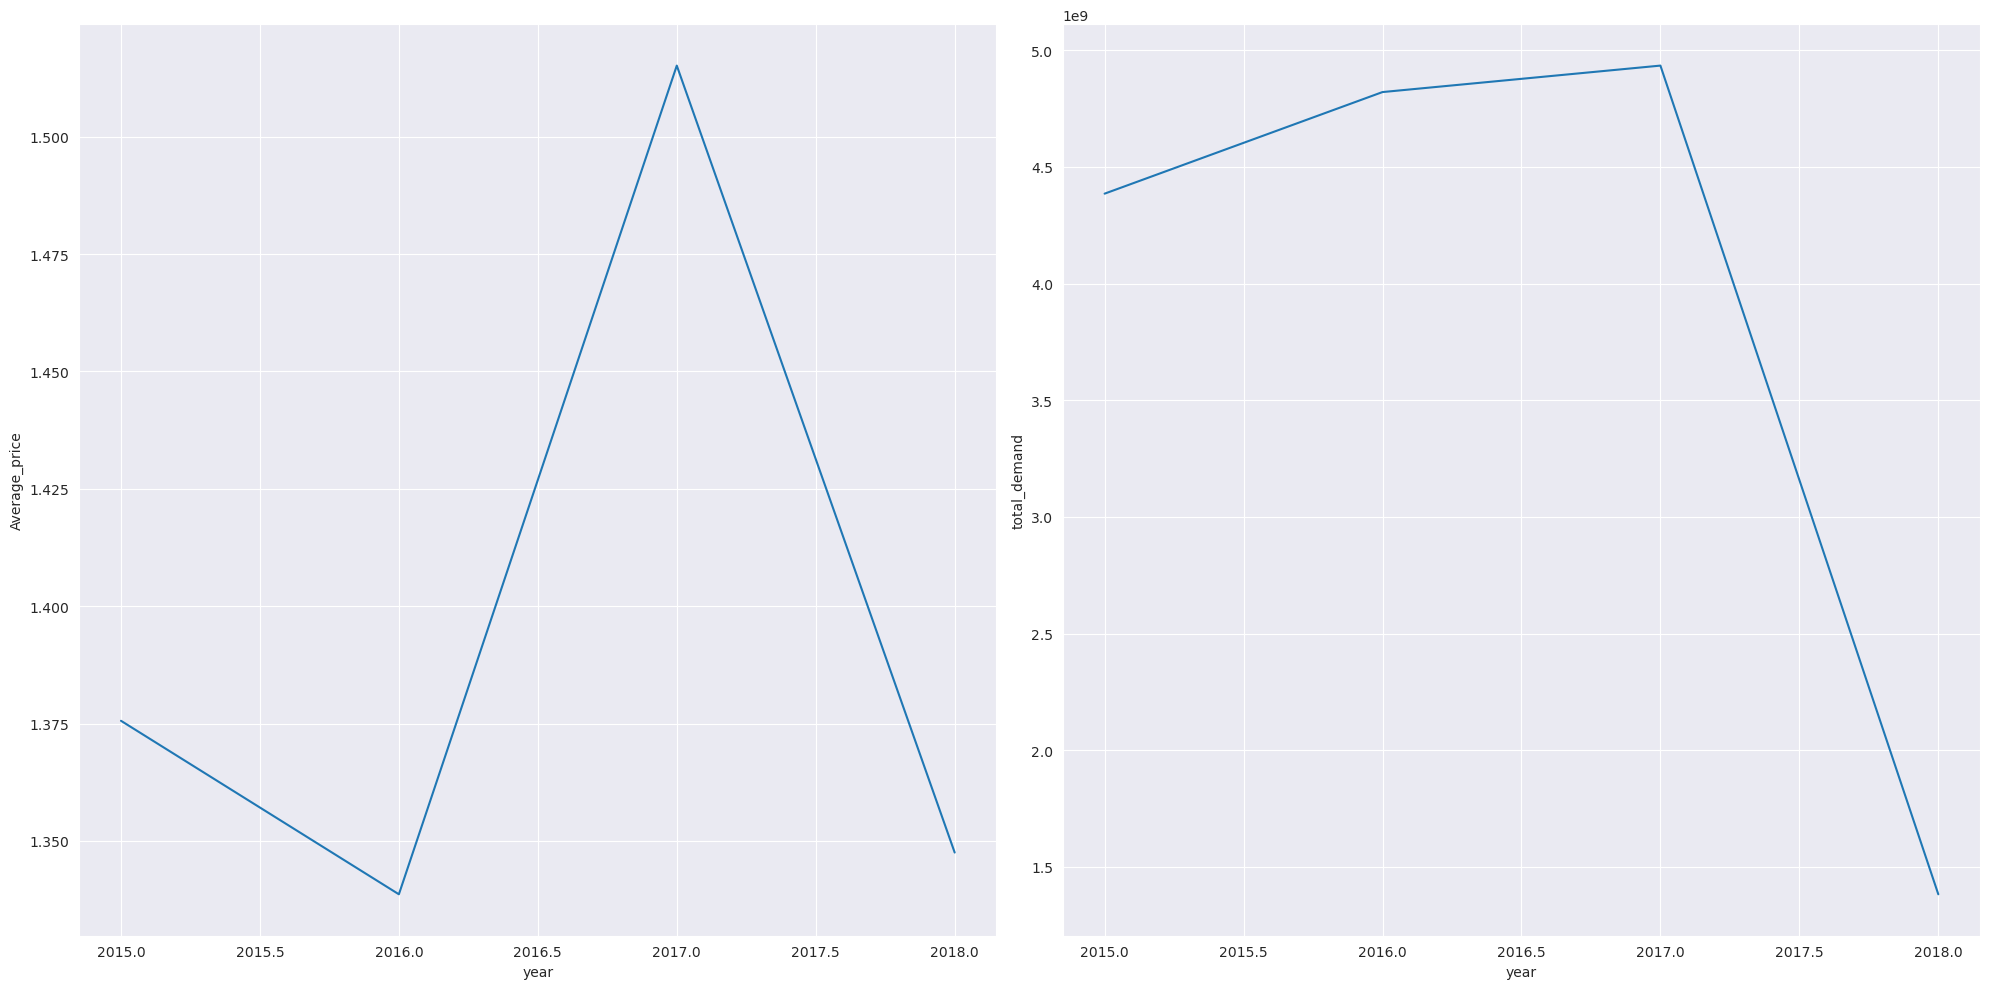

In [604]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

sns.lineplot(
    ax=axes[0],
    data=average_price_per_year,
    x='year',
    y='Average_price',
    markers=False,
    legend=True
)

sns.lineplot(
    ax=axes[1],
    data=demands_per_year,
    x='year',
    y='total_demand',
    markers=False,
    legend=True
)

plt.tight_layout()
plt.show()

### Change in avocado demand over the years

Looking at the trend over time, there is a noticeable decline in overall avocado demand. This suggests that people may have gradually started losing interest in avocados, or at least purchasing them less frequently during certain years.

However, this drop in demand does not necessarily mean that consumer preference alone changed. There could have been **external factors** influencing the market. For example, issues related to avocado production, supply shortages, or crop yield problems between 2017 and 2018 may have contributed to the sudden decline in total sales volume.

To understand whether price played a role, the average avocado price in 2017 was also examined. Even though the average price across all avocado categories was around **$2**, this does not appear high enough to fully explain the sharp drop in demand. This suggests that pricing alone was likely not the main reason behind the decline.

Overall, the change in demand seems to be driven by a combination of factors, possibly including supply-side limitations and broader market conditions, rather than a simple loss of consumer interest.

In [605]:
df.sample(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7051,4,2017-12-03,0.970000,266547.000000,163448.000000,19343.000000,2002.000000,81753.000000,77355.000000,3609.000000,790.000000,conventional,2017,NewOrleansMobile
16037,24,2017-07-16,1.440000,5473.090000,6.650000,14.620000,0.000000,5451.820000,5448.490000,3.330000,0.000000,organic,2017,MiamiFtLauderdale
8600,2,2018-03-11,1.050000,212107.870000,60498.560000,22813.020000,2942.750000,125853.540000,85932.680000,39844.530000,76.330000,conventional,2018,Columbus
1710,46,2015-02-08,1.090000,477875.710000,26219.210000,336509.390000,1353.940000,113793.170000,100107.790000,13683.870000,1.510000,conventional,2015,Philadelphia
17450,6,2017-11-19,1.770000,967886.130000,88110.880000,213230.360000,834.300000,665229.980000,587077.230000,77963.170000,189.580000,organic,2017,TotalUS


In [606]:
per_year_per_region_demand = df.groupby(by=['year', 'region'], as_index=False).agg(
    total_demand=('Total Volume', 'sum'),
)

In [607]:
per_year_per_region_demand

,year,region,total_demand
0,2015,Albany,4029896.430000
1,2015,Atlanta,23231698.120000
2,2015,BaltimoreWashington,40645579.540000
3,2015,Boise,3784357.340000
4,2015,Boston,27454991.640000
...,...,...,...
211,2018,Syracuse,1046987.660000
212,2018,Tampa,6642055.000000
213,2018,TotalUS,523632254.220000
214,2018,West,92477085.010000


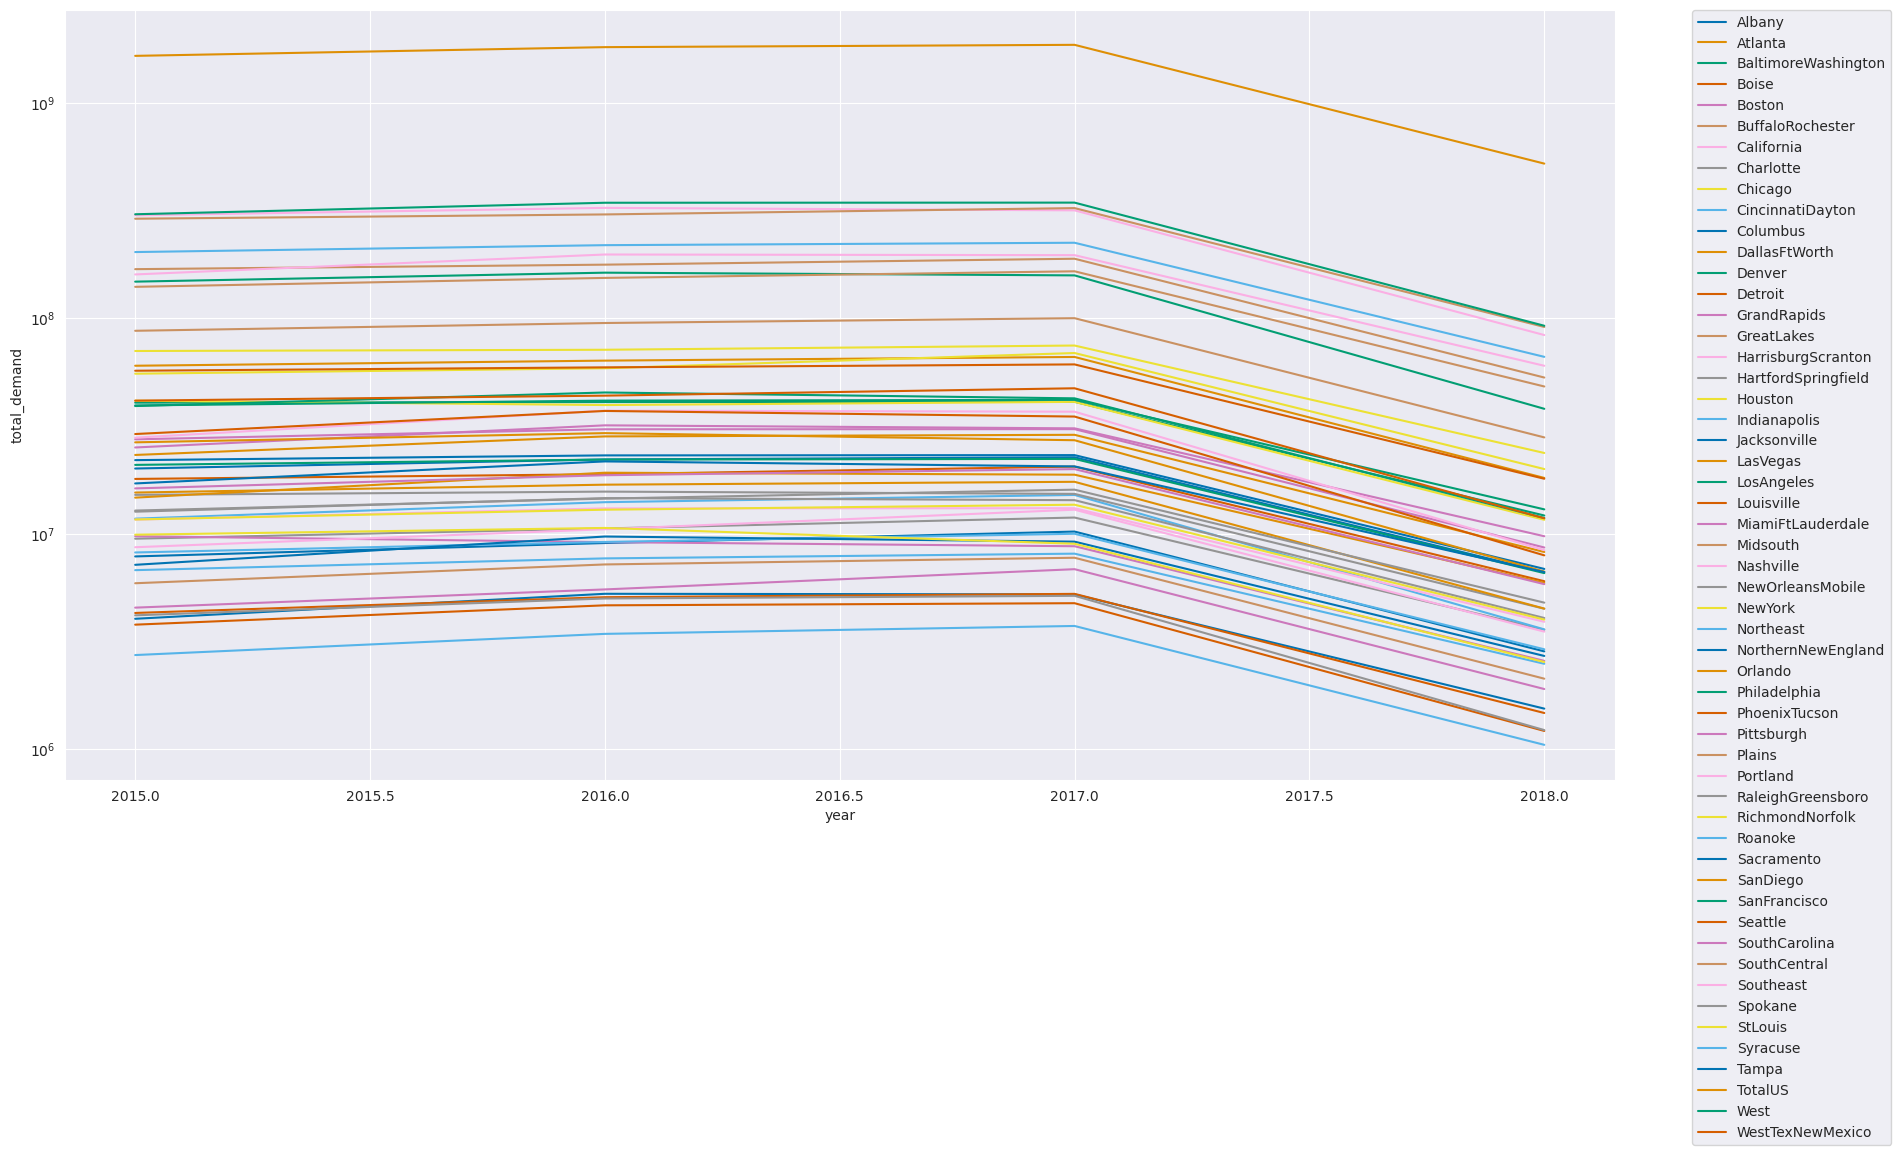

In [608]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=per_year_per_region_demand, x='year', y='total_demand', hue='region', palette='colorblind')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Decline in demand after 2017 across regions

After applying a log scale to account for large differences in demand across regions, a clear pattern emerges: **almost all regions show a noticeable decline in total avocado demand after 2017**.

What is important here is that this decline is **consistent across regions**, not limited to a single market or a few outliers. This suggests that the drop in demand is likely driven by broader factors affecting the overall market rather than region-specific issues.

The log scale helps confirm that this pattern is not caused by a few high-demand regions dominating the plot, but reflects a genuine downward trend visible even in smaller regions.


In [609]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.330000,64236.620000,1036.740000,54454.850000,48.160000,8696.870000,8603.620000,93.250000,0.000000,conventional,2015,Albany
1,1,2015-12-20,1.350000,54876.980000,674.280000,44638.810000,58.330000,9505.560000,9408.070000,97.490000,0.000000,conventional,2015,Albany
2,2,2015-12-13,0.930000,118220.220000,794.700000,109149.670000,130.500000,8145.350000,8042.210000,103.140000,0.000000,conventional,2015,Albany
3,3,2015-12-06,1.080000,78992.150000,1132.000000,71976.410000,72.580000,5811.160000,5677.400000,133.760000,0.000000,conventional,2015,Albany
4,4,2015-11-29,1.280000,51039.600000,941.480000,43838.390000,75.780000,6183.950000,5986.260000,197.690000,0.000000,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.630000,17074.830000,2046.960000,1529.200000,0.000000,13498.670000,13066.820000,431.850000,0.000000,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.710000,13888.040000,1191.700000,3431.500000,0.000000,9264.840000,8940.040000,324.800000,0.000000,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.870000,13766.760000,1191.920000,2452.790000,727.940000,9394.110000,9351.800000,42.310000,0.000000,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.930000,16205.220000,1527.630000,2981.040000,727.010000,10969.540000,10919.540000,50.000000,0.000000,organic,2018,WestTexNewMexico


In [610]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [611]:
df_time = df.copy()

In [612]:
df_time['Date'] = pd.to_datetime(df_time['Date'])

In [613]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [614]:
df_time = df_time.set_index('Date')

In [615]:
df_time = df_time.drop(labels=['Unnamed: 0'], axis=1)

In [616]:
df_time = df_time.sort_index()

In [617]:
df_time.sample(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2016-03-13,1.100000,7739.620000,1855.250000,429.470000,1.740000,5453.160000,66.900000,5386.260000,0.000000,organic,2016,StLouis
2015-05-17,1.200000,358753.170000,4623.900000,281567.100000,249.300000,72312.870000,69888.230000,2424.640000,0.000000,conventional,2015,HartfordSpringfield
2016-08-28,1.180000,145323.220000,34912.970000,94928.790000,53.850000,15427.610000,14367.640000,269.970000,790.000000,conventional,2016,Albany
2018-02-18,1.420000,796515.520000,92816.970000,487724.440000,4694.080000,211280.030000,206322.720000,4030.640000,926.670000,conventional,2018,BaltimoreWashington
2017-07-02,1.260000,3218961.840000,663114.750000,1257956.680000,30426.630000,1267463.780000,1026992.740000,187005.450000,53465.590000,conventional,2017,Midsouth
2015-05-24,1.600000,203951.840000,90538.000000,69103.550000,86.820000,44223.470000,7078.290000,37145.180000,0.000000,organic,2015,West
2015-08-16,1.230000,372516.000000,2067.210000,304465.270000,775.000000,65208.520000,65208.520000,0.000000,0.000000,conventional,2015,NorthernNewEngland
2015-08-16,2.090000,2694.610000,297.300000,1041.090000,0.000000,1356.220000,1356.220000,0.000000,0.000000,organic,2015,Boston
2015-02-08,1.020000,239756.620000,35933.380000,126557.740000,722.590000,76542.910000,75408.570000,1134.340000,0.000000,conventional,2015,HarrisburgScranton


In [618]:
df_time = df_time.reset_index()

In [619]:
df_time

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.750000,27365.890000,9307.340000,3844.810000,615.280000,13598.460000,13061.100000,537.360000,0.000000,organic,2015,Southeast
1,2015-01-04,1.490000,17723.170000,1189.350000,15628.270000,0.000000,905.550000,905.550000,0.000000,0.000000,organic,2015,Chicago
2,2015-01-04,1.680000,2896.720000,161.680000,206.960000,0.000000,2528.080000,2528.080000,0.000000,0.000000,organic,2015,HarrisburgScranton
3,2015-01-04,1.520000,54956.800000,3013.040000,35456.880000,1561.700000,14925.180000,11264.800000,3660.380000,0.000000,conventional,2015,Pittsburgh
4,2015-01-04,1.640000,1505.120000,1.270000,1129.500000,0.000000,374.350000,186.670000,187.680000,0.000000,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-03-25,1.360000,908202.130000,142681.060000,463136.280000,174975.750000,127409.040000,103579.410000,22467.040000,1362.590000,conventional,2018,Chicago
18245,2018-03-25,0.700000,9010588.320000,3999735.710000,966589.500000,30130.820000,4014132.290000,3398569.920000,546409.740000,69152.630000,conventional,2018,SouthCentral
18246,2018-03-25,1.420000,163496.700000,29253.300000,5080.040000,0.000000,129163.360000,109052.260000,20111.100000,0.000000,organic,2018,SouthCentral
18247,2018-03-25,1.700000,190257.380000,29644.090000,70982.100000,0.000000,89631.190000,89424.110000,207.080000,0.000000,organic,2018,California


In [620]:
df_time['week_label'] = df_time['Date'].dt.isocalendar().week

In [621]:
max(df_time['week_label'])

53

In [622]:
df_time.loc[:, ['week_label']].nunique()

week_label    53
dtype: int64

In [623]:
# df_time['Lagging_Features'] = df_time.groupby(by=['region'])['AveragePrice'].shift(1)

In [624]:
df_time = df_time.sort_values(by=['region', 'Date'], ascending=[True, True])

In [625]:
df_time[['region', 'Date', 'AveragePrice']]

,region,Date,AveragePrice
22,Albany,2015-01-04,1.790000
85,Albany,2015-01-04,1.220000
184,Albany,2015-01-11,1.770000
209,Albany,2015-01-11,1.240000
252,Albany,2015-01-18,1.170000
...,...,...,...
17947,WestTexNewMexico,2018-03-11,0.940000
18052,WestTexNewMexico,2018-03-18,0.880000
18068,WestTexNewMexico,2018-03-18,1.560000
18163,WestTexNewMexico,2018-03-25,1.620000


In [626]:
df_time['price_lag_1'] = (df_time.groupby(by=['region', 'type'])['AveragePrice']).shift(1)

In [627]:
df_time.groupby(["region", 'week_label'])[["AveragePrice", "price_lag_1"]].mean()

AveragePrice  price_lag_1
region           week_label                           
Albany           1               1.535000     1.508333
                 2               1.527500     1.535000
                 3               1.598750     1.527500
                 4               1.495000     1.598750
                 5               1.432500     1.495000
...                                   ...          ...
WestTexNewMexico 49              1.116000     1.176000
                 50              1.218333     1.276667
                 51              1.261667     1.218333
                 52              1.176667     1.261667
                 53              1.170000     1.260000

[2862 rows x 2 columns]

In [628]:
df_time = df_time.dropna()

In [629]:
df_time.groupby(["region", 'week_label'])[["AveragePrice", "price_lag_1"]].mean()

AveragePrice  price_lag_1
region           week_label                           
Albany           1               1.545000     1.508333
                 2               1.527500     1.535000
                 3               1.598750     1.527500
                 4               1.495000     1.598750
                 5               1.432500     1.495000
...                                   ...          ...
WestTexNewMexico 49              1.116000     1.176000
                 50              1.218333     1.276667
                 51              1.261667     1.218333
                 52              1.176667     1.261667
                 53              1.170000     1.260000

[2862 rows x 2 columns]

In [630]:
df_time

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,week_label,price_lag_1
184,2015-01-11,1.770000,1182.560000,39.000000,305.120000,0.000000,838.440000,838.440000,0.000000,0.000000,organic,2015,Albany,2,1.790000
209,2015-01-11,1.240000,41195.080000,1002.850000,31640.340000,127.120000,8424.770000,8036.040000,388.730000,0.000000,conventional,2015,Albany,2,1.220000
252,2015-01-18,1.170000,44511.280000,914.140000,31540.320000,135.770000,11921.050000,11651.090000,269.960000,0.000000,conventional,2015,Albany,3,1.240000
297,2015-01-18,1.930000,1118.470000,8.020000,178.780000,0.000000,931.670000,931.670000,0.000000,0.000000,organic,2015,Albany,3,1.770000
381,2015-01-25,1.890000,1115.890000,14.870000,148.720000,0.000000,952.300000,952.300000,0.000000,0.000000,organic,2015,Albany,4,1.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17947,2018-03-11,0.940000,897607.120000,467501.550000,154130.630000,11380.260000,264594.680000,152380.600000,110322.160000,1891.920000,conventional,2018,WestTexNewMexico,10,0.880000
18052,2018-03-18,0.880000,855251.170000,457635.790000,137597.040000,8422.080000,251596.260000,151191.850000,98535.600000,1868.810000,conventional,2018,WestTexNewMexico,11,0.940000
18068,2018-03-18,1.560000,15896.380000,2055.350000,1499.550000,0.000000,12341.480000,12114.810000,226.670000,0.000000,organic,2018,WestTexNewMexico,11,1.560000
18163,2018-03-25,1.620000,15303.400000,2325.300000,2171.660000,0.000000,10806.440000,10569.800000,236.640000,0.000000,organic,2018,WestTexNewMexico,12,1.560000


In [631]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18141 entries, 184 to 18193
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18141 non-null  datetime64[ns]
 1   AveragePrice  18141 non-null  float64       
 2   Total Volume  18141 non-null  float64       
 3   4046          18141 non-null  float64       
 4   4225          18141 non-null  float64       
 5   4770          18141 non-null  float64       
 6   Total Bags    18141 non-null  float64       
 7   Small Bags    18141 non-null  float64       
 8   Large Bags    18141 non-null  float64       
 9   XLarge Bags   18141 non-null  float64       
 10  type          18141 non-null  object        
 11  year          18141 non-null  int64         
 12  region        18141 non-null  object        
 13  week_label    18141 non-null  UInt32        
 14  price_lag_1   18141 non-null  float64       
dtypes: UInt32(1), datetime64[ns](1), float6

In [632]:
df_time.query('year == 2015 | year == 2016')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,week_label,price_lag_1
184,2015-01-11,1.770000,1182.560000,39.000000,305.120000,0.000000,838.440000,838.440000,0.000000,0.000000,organic,2015,Albany,2,1.790000
209,2015-01-11,1.240000,41195.080000,1002.850000,31640.340000,127.120000,8424.770000,8036.040000,388.730000,0.000000,conventional,2015,Albany,2,1.220000
252,2015-01-18,1.170000,44511.280000,914.140000,31540.320000,135.770000,11921.050000,11651.090000,269.960000,0.000000,conventional,2015,Albany,3,1.240000
297,2015-01-18,1.930000,1118.470000,8.020000,178.780000,0.000000,931.670000,931.670000,0.000000,0.000000,organic,2015,Albany,3,1.770000
381,2015-01-25,1.890000,1115.890000,14.870000,148.720000,0.000000,952.300000,952.300000,0.000000,0.000000,organic,2015,Albany,4,1.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10937,2016-12-11,0.790000,776453.820000,308697.330000,68324.890000,12632.730000,386798.870000,167338.470000,219187.070000,273.330000,conventional,2016,WestTexNewMexico,49,0.850000
11053,2016-12-18,0.760000,790789.790000,388322.100000,66773.280000,12379.190000,323315.220000,142224.290000,180677.600000,413.330000,conventional,2016,WestTexNewMexico,50,0.790000
11117,2016-12-18,1.340000,11406.500000,945.890000,2571.830000,31.470000,7857.310000,7819.170000,38.140000,0.000000,organic,2016,WestTexNewMexico,50,1.540000
11170,2016-12-25,0.730000,867992.740000,484143.840000,69977.400000,15998.990000,297872.510000,130112.090000,167620.420000,140.000000,conventional,2016,WestTexNewMexico,51,0.760000


In [633]:
past_dataframe = df_time.query('year in [2015, 2016]')

In [634]:
past_dataframe

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,week_label,price_lag_1
184,2015-01-11,1.770000,1182.560000,39.000000,305.120000,0.000000,838.440000,838.440000,0.000000,0.000000,organic,2015,Albany,2,1.790000
209,2015-01-11,1.240000,41195.080000,1002.850000,31640.340000,127.120000,8424.770000,8036.040000,388.730000,0.000000,conventional,2015,Albany,2,1.220000
252,2015-01-18,1.170000,44511.280000,914.140000,31540.320000,135.770000,11921.050000,11651.090000,269.960000,0.000000,conventional,2015,Albany,3,1.240000
297,2015-01-18,1.930000,1118.470000,8.020000,178.780000,0.000000,931.670000,931.670000,0.000000,0.000000,organic,2015,Albany,3,1.770000
381,2015-01-25,1.890000,1115.890000,14.870000,148.720000,0.000000,952.300000,952.300000,0.000000,0.000000,organic,2015,Albany,4,1.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10937,2016-12-11,0.790000,776453.820000,308697.330000,68324.890000,12632.730000,386798.870000,167338.470000,219187.070000,273.330000,conventional,2016,WestTexNewMexico,49,0.850000
11053,2016-12-18,0.760000,790789.790000,388322.100000,66773.280000,12379.190000,323315.220000,142224.290000,180677.600000,413.330000,conventional,2016,WestTexNewMexico,50,0.790000
11117,2016-12-18,1.340000,11406.500000,945.890000,2571.830000,31.470000,7857.310000,7819.170000,38.140000,0.000000,organic,2016,WestTexNewMexico,50,1.540000
11170,2016-12-25,0.730000,867992.740000,484143.840000,69977.400000,15998.990000,297872.510000,130112.090000,167620.420000,140.000000,conventional,2016,WestTexNewMexico,51,0.760000


In [635]:
future_dataframe = df_time.query('year == 2017')

In [636]:
future_dataframe

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,week_label,price_lag_1
11243,2017-01-01,1.470000,129948.230000,4845.770000,117027.410000,200.360000,7874.690000,7866.860000,7.830000,0.000000,conventional,2017,Albany,52,1.520000
11278,2017-01-01,1.870000,1376.700000,71.650000,192.630000,0.000000,1112.420000,1112.420000,0.000000,0.000000,organic,2017,Albany,52,1.930000
11355,2017-01-08,1.940000,2229.520000,63.460000,478.310000,0.000000,1687.750000,1687.750000,0.000000,0.000000,organic,2017,Albany,1,1.870000
11416,2017-01-08,1.550000,91728.180000,3355.470000,75641.230000,56.910000,12674.570000,12606.670000,67.900000,0.000000,conventional,2017,Albany,1,1.470000
11492,2017-01-15,1.840000,1982.650000,82.300000,328.020000,0.000000,1572.330000,1572.330000,0.000000,0.000000,organic,2017,Albany,2,1.940000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16670,2017-12-17,0.850000,754023.660000,390096.350000,161122.140000,6208.150000,196597.020000,94766.700000,101820.320000,10.000000,conventional,2017,WestTexNewMexico,50,0.860000
16833,2017-12-24,0.930000,769970.840000,402476.910000,150206.860000,7966.080000,209320.990000,96489.710000,112764.620000,66.660000,conventional,2017,WestTexNewMexico,51,0.850000
16842,2017-12-24,1.850000,16740.760000,1904.470000,2246.260000,0.000000,12590.030000,12235.550000,354.480000,0.000000,organic,2017,WestTexNewMexico,51,1.780000
16860,2017-12-31,0.890000,727024.030000,347248.160000,158559.970000,5628.280000,215587.620000,78402.090000,137088.870000,96.660000,conventional,2017,WestTexNewMexico,52,0.930000


In [637]:
print(max(past_dataframe['week_label']), 'and', max(future_dataframe['week_label']))

53 and 52


In [638]:
past_dataframe

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,week_label,price_lag_1
184,2015-01-11,1.770000,1182.560000,39.000000,305.120000,0.000000,838.440000,838.440000,0.000000,0.000000,organic,2015,Albany,2,1.790000
209,2015-01-11,1.240000,41195.080000,1002.850000,31640.340000,127.120000,8424.770000,8036.040000,388.730000,0.000000,conventional,2015,Albany,2,1.220000
252,2015-01-18,1.170000,44511.280000,914.140000,31540.320000,135.770000,11921.050000,11651.090000,269.960000,0.000000,conventional,2015,Albany,3,1.240000
297,2015-01-18,1.930000,1118.470000,8.020000,178.780000,0.000000,931.670000,931.670000,0.000000,0.000000,organic,2015,Albany,3,1.770000
381,2015-01-25,1.890000,1115.890000,14.870000,148.720000,0.000000,952.300000,952.300000,0.000000,0.000000,organic,2015,Albany,4,1.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10937,2016-12-11,0.790000,776453.820000,308697.330000,68324.890000,12632.730000,386798.870000,167338.470000,219187.070000,273.330000,conventional,2016,WestTexNewMexico,49,0.850000
11053,2016-12-18,0.760000,790789.790000,388322.100000,66773.280000,12379.190000,323315.220000,142224.290000,180677.600000,413.330000,conventional,2016,WestTexNewMexico,50,0.790000
11117,2016-12-18,1.340000,11406.500000,945.890000,2571.830000,31.470000,7857.310000,7819.170000,38.140000,0.000000,organic,2016,WestTexNewMexico,50,1.540000
11170,2016-12-25,0.730000,867992.740000,484143.840000,69977.400000,15998.990000,297872.510000,130112.090000,167620.420000,140.000000,conventional,2016,WestTexNewMexico,51,0.760000


In [639]:
past_dataframe = past_dataframe.drop(labels=['Date', 'year'], axis=1)

In [640]:
past_dataframe

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,week_label,price_lag_1
184,1.770000,1182.560000,39.000000,305.120000,0.000000,838.440000,838.440000,0.000000,0.000000,organic,Albany,2,1.790000
209,1.240000,41195.080000,1002.850000,31640.340000,127.120000,8424.770000,8036.040000,388.730000,0.000000,conventional,Albany,2,1.220000
252,1.170000,44511.280000,914.140000,31540.320000,135.770000,11921.050000,11651.090000,269.960000,0.000000,conventional,Albany,3,1.240000
297,1.930000,1118.470000,8.020000,178.780000,0.000000,931.670000,931.670000,0.000000,0.000000,organic,Albany,3,1.770000
381,1.890000,1115.890000,14.870000,148.720000,0.000000,952.300000,952.300000,0.000000,0.000000,organic,Albany,4,1.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10937,0.790000,776453.820000,308697.330000,68324.890000,12632.730000,386798.870000,167338.470000,219187.070000,273.330000,conventional,WestTexNewMexico,49,0.850000
11053,0.760000,790789.790000,388322.100000,66773.280000,12379.190000,323315.220000,142224.290000,180677.600000,413.330000,conventional,WestTexNewMexico,50,0.790000
11117,1.340000,11406.500000,945.890000,2571.830000,31.470000,7857.310000,7819.170000,38.140000,0.000000,organic,WestTexNewMexico,50,1.540000
11170,0.730000,867992.740000,484143.840000,69977.400000,15998.990000,297872.510000,130112.090000,167620.420000,140.000000,conventional,WestTexNewMexico,51,0.760000


In [641]:
X_train = past_dataframe.drop(labels=['AveragePrice'], axis=1)

In [642]:
X_train

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,week_label,price_lag_1
184,1182.560000,39.000000,305.120000,0.000000,838.440000,838.440000,0.000000,0.000000,organic,Albany,2,1.790000
209,41195.080000,1002.850000,31640.340000,127.120000,8424.770000,8036.040000,388.730000,0.000000,conventional,Albany,2,1.220000
252,44511.280000,914.140000,31540.320000,135.770000,11921.050000,11651.090000,269.960000,0.000000,conventional,Albany,3,1.240000
297,1118.470000,8.020000,178.780000,0.000000,931.670000,931.670000,0.000000,0.000000,organic,Albany,3,1.770000
381,1115.890000,14.870000,148.720000,0.000000,952.300000,952.300000,0.000000,0.000000,organic,Albany,4,1.930000
...,...,...,...,...,...,...,...,...,...,...,...,...
10937,776453.820000,308697.330000,68324.890000,12632.730000,386798.870000,167338.470000,219187.070000,273.330000,conventional,WestTexNewMexico,49,0.850000
11053,790789.790000,388322.100000,66773.280000,12379.190000,323315.220000,142224.290000,180677.600000,413.330000,conventional,WestTexNewMexico,50,0.790000
11117,11406.500000,945.890000,2571.830000,31.470000,7857.310000,7819.170000,38.140000,0.000000,organic,WestTexNewMexico,50,1.540000
11170,867992.740000,484143.840000,69977.400000,15998.990000,297872.510000,130112.090000,167620.420000,140.000000,conventional,WestTexNewMexico,51,0.760000


In [643]:
y_train = past_dataframe['AveragePrice']

In [644]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore', drop=None)
encoder.fit(X_train[['region']])

,"categories categories: 'auto' or a list of array-like, default='auto'Categories (unique values) per feature:- 'auto' : Determine categories automatically from the training data.- list : ``categories[i]`` holds the categories expected in the ith column. The passed categories should not mix strings and numeric values within a single feature, and should be sorted in case of numeric values.The used categories can be found in the ``categories_`` attribute... versionadded:: 0.20",'auto'
,"drop drop: {'first', 'if_binary'} or an array-like of shape (n_features,), default=NoneSpecifies a methodology to use to drop one of the categories perfeature. This is useful in situations where perfectly collinearfeatures cause problems, such as when feeding the resulting datainto an unregularized linear regression model.However, dropping one category breaks the symmetry of the originalrepresentation and can therefore induce a bias in downstream models,for instance for penalized linear classification or regression models.- None : retain all features (the default).- 'first' : drop the first category in each feature. If only one category is present, the feature will be dropped entirely.- 'if_binary' : drop the first category in each feature with two categories. Features with 1 or more than 2 categories are left intact.- array : ``drop[i]`` is the category in feature ``X[:, i]`` that should be dropped.When `max_categories` or `min_frequency` is configured to groupinfrequent categories, the dropping behavior is handled after thegrouping... versionadded:: 0.21 The parameter `drop` was added in 0.21... versionchanged:: 0.23 The option `drop='if_binary'` was added in 0.23... versionchanged:: 1.1 Support for dropping infrequent categories.",None
,"sparse_output sparse_output: bool, default=TrueWhen ``True``, it returns a :class:`scipy.sparse.csr_matrix`,i.e. a sparse matrix in ""Compressed Sparse Row"" (CSR) format... versionadded:: 1.2 `sparse` was renamed to `sparse_output`",True
,"dtype dtype: number type, default=np.float64Desired dtype of output.",<class 'numpy.float64'>
,"handle_unknown handle_unknown: {'error', 'ignore', 'infrequent_if_exist', 'warn'}, default='error'Specifies the way unknown categories are handled during :meth:`transform`.- 'error' : Raise an error if an unknown category is present during transform.- 'ignore' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform, an unknown category will be denoted as None.- 'infrequent_if_exist' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will map to the infrequent category if it exists. The infrequent category will be mapped to the last position in the encoding. During inverse transform, an unknown category will be mapped to the category denoted `'infrequent'` if it exists. If the `'infrequent'` category does not exist, then :meth:`transform` and :meth:`inverse_transform` will handle an unknown category as with `handle_unknown='ignore'`. Infrequent categories exist based on `min_frequency` and `max_categories`. Read more in the :ref:`User Guide `.- 'warn' : When an unknown category is encountered during transform a warning is issued, and the encoding then proceeds as described for `handle_unknown=""infrequent_if_exist""`... versionchanged:: 1.1 `'infrequent_if_exist'` was added to automatically handle unknown categories and infrequent categories... versionadded:: 1.6 The option `""warn""` was added in 1.6.",'ignore'
,"min_frequency min_frequency: int or float, default=NoneSpecifies the minimum frequency below which a category will beconsidered infrequent.- If `int`, categories with a smaller cardinality will be considered infrequent.- If `float`, categories with a smaller cardinality than `min_frequency * n_samples` will be considered infrequent... versionadded:: 1.1 Read more in the :ref:`User Guide `.",None
,"max_categ

In [645]:
X_train

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,week_label,price_lag_1
184,1182.560000,39.000000,305.120000,0.000000,838.440000,838.440000,0.000000,0.000000,organic,Albany,2,1.790000
209,41195.080000,1002.850000,31640.340000,127.120000,8424.770000,8036.040000,388.730000,0.000000,conventional,Albany,2,1.220000
252,44511.280000,914.140000,31540.320000,135.770000,11921.050000,11651.090000,269.960000,0.000000,conventional,Albany,3,1.240000
297,1118.470000,8.020000,178.780000,0.000000,931.670000,931.670000,0.000000,0.000000,organic,Albany,3,1.770000
381,1115.890000,14.870000,148.720000,0.000000,952.300000,952.300000,0.000000,0.000000,organic,Albany,4,1.930000
...,...,...,...,...,...,...,...,...,...,...,...,...
10937,776453.820000,308697.330000,68324.890000,12632.730000,386798.870000,167338.470000,219187.070000,273.330000,conventional,WestTexNewMexico,49,0.850000
11053,790789.790000,388322.100000,66773.280000,12379.190000,323315.220000,142224.290000,180677.600000,413.330000,conventional,WestTexNewMexico,50,0.790000
11117,11406.500000,945.890000,2571.830000,31.470000,7857.310000,7819.170000,38.140000,0.000000,organic,WestTexNewMexico,50,1.540000
11170,867992.740000,484143.840000,69977.400000,15998.990000,297872.510000,130112.090000,167620.420000,140.000000,conventional,WestTexNewMexico,51,0.760000


In [646]:
X_train.columns

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'region', 'week_label',
       'price_lag_1'],
      dtype='object')

In [647]:
X_train_cate = encoder.transform(X_train[['region']])

In [648]:
X_train['type'] = X_train['type'].map({
    'organic': 1,
    'conventional': 0
})

In [670]:
X_train

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,week_label,price_lag_1
184,1182.560000,39.000000,305.120000,0.000000,838.440000,838.440000,0.000000,0.000000,1.000000,2.000000,1.790000
209,41195.080000,1002.850000,31640.340000,127.120000,8424.770000,8036.040000,388.730000,0.000000,0.000000,2.000000,1.220000
252,44511.280000,914.140000,31540.320000,135.770000,11921.050000,11651.090000,269.960000,0.000000,0.000000,3.000000,1.240000
297,1118.470000,8.020000,178.780000,0.000000,931.670000,931.670000,0.000000,0.000000,1.000000,3.000000,1.770000
381,1115.890000,14.870000,148.720000,0.000000,952.300000,952.300000,0.000000,0.000000,1.000000,4.000000,1.930000
...,...,...,...,...,...,...,...,...,...,...,...
10937,776453.820000,308697.330000,68324.890000,12632.730000,386798.870000,167338.470000,219187.070000,273.330000,0.000000,49.000000,0.850000
11053,790789.790000,388322.100000,66773.280000,12379.190000,323315.220000,142224.290000,180677.600000,413.330000,0.000000,50.000000,0.790000
11117,11406.500000,945.890000,2571.830000,31.470000,7857.310000,7819.170000,38.140000,0.000000,1.000000,50.000000,1.540000
11170,867992.740000,484143.840000,69977.400000,15998.990000,297872.510000,130112.090000,167620.420000,140.000000,0.000000,51.000000,0.760000


In [671]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11123 entries, 184 to 11203
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total Volume  11123 non-null  float64
 1   4046          11123 non-null  float64
 2   4225          11123 non-null  float64
 3   4770          11123 non-null  float64
 4   Total Bags    11123 non-null  float64
 5   Small Bags    11123 non-null  float64
 6   Large Bags    11123 non-null  float64
 7   XLarge Bags   11123 non-null  float64
 8   type          11123 non-null  float64
 9   week_label    11123 non-null  float64
 10  price_lag_1   11123 non-null  float64
dtypes: float64(11)
memory usage: 1.0 MB


In [672]:
num_cols = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
            'Large Bags', 'XLarge Bags', 'type', 'week_label',
            'price_lag_1']

In [673]:
X_train = X_train.loc[:, num_cols].astype('float64')

In [674]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11123 entries, 184 to 11203
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total Volume  11123 non-null  float64
 1   4046          11123 non-null  float64
 2   4225          11123 non-null  float64
 3   4770          11123 non-null  float64
 4   Total Bags    11123 non-null  float64
 5   Small Bags    11123 non-null  float64
 6   Large Bags    11123 non-null  float64
 7   XLarge Bags   11123 non-null  float64
 8   type          11123 non-null  float64
 9   week_label    11123 non-null  float64
 10  price_lag_1   11123 non-null  float64
dtypes: float64(11)
memory usage: 1.0 MB


In [675]:
X_train_num = X_train.loc[:, num_cols].values

In [676]:
X_train_num

array([[1.1825600e+03, 3.9000000e+01, 3.0512000e+02, ..., 1.0000000e+00,
        2.0000000e+00, 1.7900000e+00],
       [4.1195080e+04, 1.0028500e+03, 3.1640340e+04, ..., 0.0000000e+00,
        2.0000000e+00, 1.2200000e+00],
       [4.4511280e+04, 9.1414000e+02, 3.1540320e+04, ..., 0.0000000e+00,
        3.0000000e+00, 1.2400000e+00],
       ...,
       [1.1406500e+04, 9.4589000e+02, 2.5718300e+03, ..., 1.0000000e+00,
        5.0000000e+01, 1.5400000e+00],
       [8.6799274e+05, 4.8414384e+05, 6.9977400e+04, ..., 0.0000000e+00,
        5.1000000e+01, 7.6000000e-01],
       [1.7382200e+04, 1.3817200e+03, 3.0991600e+03, ..., 1.0000000e+00,
        5.1000000e+01, 1.3400000e+00]])

In [677]:
print(X_train_cate)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 11123 stored elements and shape (11123, 54)>
  Coords	Values
  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 0)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  :	:
  (11098, 53)	1.0
  (11099, 53)	1.0
  (11100, 53)	1.0
  (11101, 53)	1.0
  (11102, 53)	1.0
  (11103, 53)	1.0
  (11104, 53)	1.0
  (11105, 53)	1.0
  (11106, 53)	1.0
  (11107, 53)	1.0
  (11108, 53)	1.0
  (11109, 53)	1.0
  (11110, 53)	1.0
  (11111, 53)	1.0
  (11112, 53)	1.0
  (11113, 53)	1.0
  (11114, 53)	1.0
  (11115, 53)	1.0
  (11116, 53)	1.0
  (11117, 53)	1.0
  (11118, 53)	1.0
  (11119, 53)	1.0
  (11120, 53)	1.0
  (11121, 53)	1.0
  (11122, 53)	1.0


In [663]:
print(type(X_train_num))
print(type(X_train_cate))

<class 'numpy.ndarray'>
<class 'scipy.sparse._csr.csr_matrix'>


In [666]:
from scipy.sparse import hstack, csr_matrix

X_train_num_sparse = csr_matrix(X_train_num)
X_train_final  = hstack([X_train_num_sparse, X_train_cate])

In [669]:
print(X_train_final)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 114556 stored elements and shape (11123, 65)>
  Coords	Values
  (0, 0)	1182.56
  (0, 1)	39.0
  (0, 2)	305.12
  (0, 4)	838.44
  (0, 5)	838.44
  (0, 8)	1.0
  (0, 9)	2.0
  (0, 10)	1.79
  (0, 11)	1.0
  (1, 0)	41195.08
  (1, 1)	1002.85
  (1, 2)	31640.34
  (1, 3)	127.12
  (1, 4)	8424.77
  (1, 5)	8036.04
  (1, 6)	388.73
  (1, 9)	2.0
  (1, 10)	1.22
  (1, 11)	1.0
  (2, 0)	44511.28
  (2, 1)	914.14
  (2, 2)	31540.32
  (2, 3)	135.77
  (2, 4)	11921.05
  (2, 5)	11651.09
  :	:
  (11120, 9)	50.0
  (11120, 10)	1.54
  (11120, 64)	1.0
  (11121, 0)	867992.74
  (11121, 1)	484143.84
  (11121, 2)	69977.4
  (11121, 3)	15998.99
  (11121, 4)	297872.51
  (11121, 5)	130112.09
  (11121, 6)	167620.42
  (11121, 7)	140.0
  (11121, 9)	51.0
  (11121, 10)	0.76
  (11121, 64)	1.0
  (11122, 0)	17382.2
  (11122, 1)	1381.72
  (11122, 2)	3099.16
  (11122, 3)	20.05
  (11122, 4)	12881.27
  (11122, 5)	12843.07
  (11122, 6)	38.2
  (11122, 8)	1.0
  (11122, 9)	51.0
  (11